In [ ]:
!cd-hit-est -i lupinus_albus_transcriptome.fasta -o cd_hit_out.fasta -c 0.95 -n 5 -T 2 -M 30000

In [ ]:
!/home/amogus/miniconda3/opt/trinity-2.15.1/util/misc/get_longest_isoform_seq_per_trinity_gene.pl /
cd_hit_out.fasta > cd_hit_out_longest_is.fasta

In [ ]:
!busco -i cd_hit_out_longest_is.fasta /
-l ~/busco_datasets/lineages/fabales_odb10 -o cd_hit_classic_busco_log -m tran --offline --cpu 20 -f &

In [8]:
!/home/amogus/miniconda3/opt/trinity-2.15.1/util/misc/trinity_component_distribution.pl \
cd_hit_out_classic_longest_is.fasta




Done.  See files dist.comp_sizes.txt and dist.trans_lengths.txt



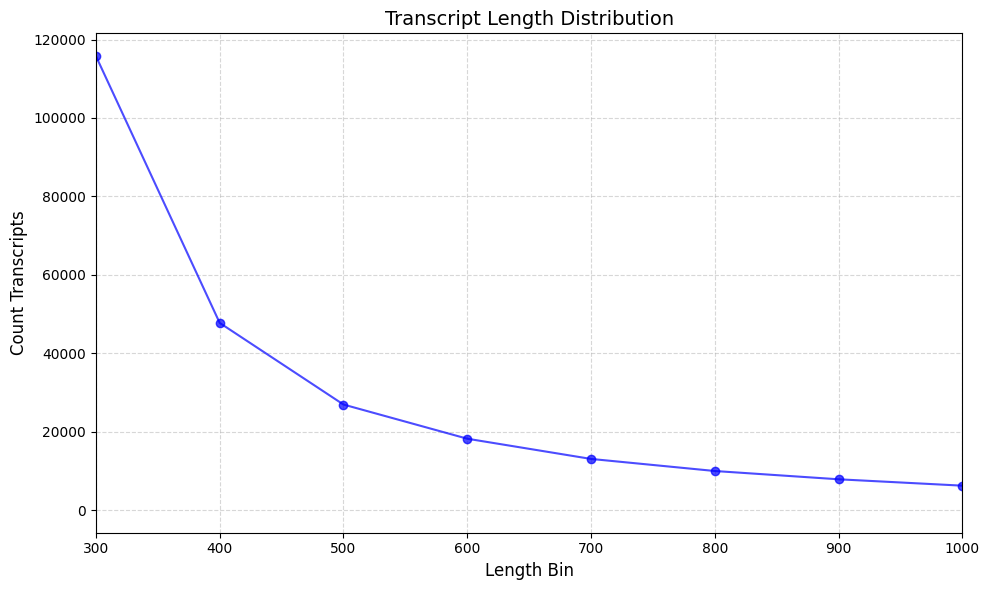

In [1]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('dist.trans_lengths.txt', skiprows=1)  # Замените 'path_to_your_file.txt' на путь к вашему файлу

length_bin = data[:, 0]
count_trans = data[:, 1]

plt.figure(figsize=(10, 6))
plt.plot(length_bin, count_trans, marker='o', color='b', linestyle='-', alpha=0.7)

plt.xlim(300, 1000)

plt.xlabel('Length Bin', fontsize=12)
plt.ylabel('Count Transcripts', fontsize=12)
plt.title('Transcript Length Distribution', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [1]:
!/home/amogus/miniconda3/opt/trinity-2.15.1/util/support_scripts/get_Trinity_gene_to_trans_map.pl \
cd_hit_out_classic_longest_is.fasta > cd_hit_out_classic_longest_is_transmap

In [ ]:
!TransDecoder.LongOrfs --gene_trans_map cd_hit_out_classic_longest_is_transmap \
-t cd_hit_out_classic_longest_is.fasta

In [ ]:
!blastp -db blast/faba_arabidopsis -out blast/cd_hit_classic_annot_longest_is_blastp -evalue 0.05 \
-query cd_hit_out_classic_longest_is.fasta.transdecoder_dir/longest_orfs.pep \
-outfmt 6 -max_target_seqs 1 -num_threads 3

In [5]:
!kallisto index -i kallisto_index/cd_hit_out_classic_long_is -k 25 cd_hit_out_classic_longest_is.fasta


[build] loading fasta file cd_hit_out_classic_longest_is.fasta
[build] k-mer length: 25
[build] warning: clipped off poly-A tail (longer than 10)
        from 796 target sequences
KmerStream::KmerStream(): Start computing k-mer cardinality estimations (1/2)
KmerStream::KmerStream(): Start computing k-mer cardinality estimations (1/2)
KmerStream::KmerStream(): Finished
CompactedDBG::build(): Estimated number of k-mers occurring at least once: 181662214
CompactedDBG::build(): Estimated number of minimizer occurring at least once: 42462573
CompactedDBG::filter(): Processed 194104816 k-mers in 294099 reads
CompactedDBG::filter(): Found 181482196 unique k-mers
CompactedDBG::filter(): Number of blocks in Bloom filter is 1241833
CompactedDBG::construct(): Extract approximate unitigs (1/2)
CompactedDBG::construct(): Extract approximate unitigs (2/2)
CompactedDBG::construct(): Closed all input files

CompactedDBG::construct(): Splitting unitigs (1/2)

CompactedDBG::construct(): Splitting uniti

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Andromeda_Rep1_139.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3 \
test_link/Andromeda_Rep1_139.1_pairedR1.fastq.gz test_link/Andromeda_Rep1_139.1_pairedR2.fastq.gz


[quant] fragment length distribution will be estimated from the data
[index] k-mer length: 25
[index] number of targets: 294,099
[index] number of k-mers: 181,644,122
[quant] running in paired-end mode
[quant] will process pair 1: test_link/Andromeda_Rep1_139.1_pairedR1.fastq.gz
                             test_link/Andromeda_Rep1_139.1_pairedR2.fastq.gz
[progress] 4M reads processed (26.6% mapped)             

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Andromeda_Rep2_139.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/Andromeda_Rep2_139.1_pairedR1.fastq.gz test_link/Andromeda_Rep2_139.1_pairedR2.fastq.gz

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Andromeda_Rep3_139.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/Andromeda_Rep3_139.1_pairedR1.fastq.gz test_link/Andromeda_Rep3_139.1_pairedR2.fastq.gz

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Andromeda_Rep1_Control --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/Andromeda_Rep1_Control_pairedR1.fastq.gz test_link/Andromeda_Rep1_Control_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Andromeda_Rep2_Control --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/Andromeda_Rep2_Control_pairedR1.fastq.gz test_link/Andromeda_Rep2_Control_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Andromeda_Rep3_Control --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/Andromeda_Rep3_Control_pairedR1.fastq.gz test_link/Andromeda_Rep3_Control_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Andromeda_Rep1_3.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/Andromeda_Rep1_3.1_pairedR1.fastq.gz test_link/Andromeda_Rep1_3.1_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Andromeda_Rep2_3.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/Andromeda_Rep2_3.1_pairedR1.fastq.gz test_link/Andromeda_Rep2_3.1_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Andromeda_Rep3_3.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/Andromeda_Rep3_3.1_pairedR1.fastq.gz test_link/Andromeda_Rep3_3.1_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Michurin_Rep1_139.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/Michurin_Rep1_139.1_pairedR1.fastq.gz test_link/Michurin_Rep1_139.1_pairedR2.fastq.gz

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Michurin_Rep2_139.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/Michurin_Rep2_139.1_pairedR1.fastq.gz test_link/Michurin_Rep2_139.1_pairedR2.fastq.gz

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Michurin_Rep3_139.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/Michurin_Rep3_139.1_pairedR1.fastq.gz test_link/Michurin_Rep3_139.1_pairedR2.fastq.gz

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Michurin_Rep1_Control --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/Michurin_Rep1_Control_pairedR1.fastq.gz test_link/Michurin_Rep1_Control_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Michurin_Rep2_Control --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/Michurin_Rep2_Control_pairedR1.fastq.gz test_link/Michurin_Rep2_Control_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Michurin_Rep3_Control --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/Michurin_Rep3_Control_pairedR1.fastq.gz test_link/Michurin_Rep3_Control_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Michurin_Rep1_3.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/Michurin_Rep1_3.1_pairedR1.fastq.gz test_link/Michurin_Rep1_3.1_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Michurin_Rep2_3.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/Michurin_Rep2_3.1_pairedR1.fastq.gz test_link/Michurin_Rep2_3.1_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/Michurin_Rep3_3.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/Michurin_Rep3_3.1_pairedR1.fastq.gz test_link/Michurin_Rep3_3.1_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/SN_Rep1_Control --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/SN_Rep1_Control_pairedR1.fastq.gz test_link/SN_Rep1_Control_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/SN_Rep2_Control --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/SN_Rep2_Control_pairedR1.fastq.gz test_link/SN_Rep2_Control_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/SN_Rep3_Control --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/SN_Rep3_Control_pairedR1.fastq.gz test_link/SN_Rep3_Control_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/SN_Rep1_139.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/SN_Rep1_139.1_pairedR1.fastq.gz test_link/SN_Rep1_139.1_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/SN_Rep2_139.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/SN_Rep2_139.1_pairedR1.fastq.gz test_link/SN_Rep2_139.1_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/SN_Rep3_139.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/SN_Rep3_139.1_pairedR1.fastq.gz test_link/SN_Rep3_139.1_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/SN_Rep1_3.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/SN_Rep1_3.1_pairedR1.fastq.gz test_link/SN_Rep1_3.1_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/ccd_hit_out_classic_long_is -o quant/SN_Rep2_3.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/SN_Rep2_3.1_pairedR1.fastq.gz test_link/SN_Rep2_3.1_pairedR2.fastq.gz 

In [ ]:
!kallisto quant -i kallisto_index/cd_hit_out_classic_long_is -o quant/SN_Rep3_3.1 --fr-stranded \
-g Lalbus-20171117r1-v1.annot.gtf -t 3\
test_link/SN_Rep3_3.1_pairedR1.fastq.gz test_link/SN_Rep3_3.1_pairedR2.fastq.gz 